<a href="https://colab.research.google.com/github/MarekCoderslab/CHMI/blob/main/TempImport_Equitherm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opening Drive with CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Opening drive CHMI and importing all CSVs

In [ ]:
import os
import pandas as pd

# Path to your folder in Google Drive
folder_path = "/content/drive/MyDrive/Colab Notebooks/CHMI"

# Read all CSVs
dfs = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        csv_path = os.path.join(folder_path, file)
        df = pd.read_csv(csv_path, sep=",")   # change sep if needed
        df["source_file"] = file             # keep track of origin
        dfs.append(df)

# Combine into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Show first rows
print(combined_df.head())


         STATION ELEMENT                 DT  VALUE FLAG  QUALITY  Unnamed: 6  \
0  0-203-0-11621     TPM  2018-01-01T00:00Z    5.8  NaN      0.0         NaN   
1  0-203-0-11621     TPM  2018-01-01T00:10Z    5.8  NaN      0.0         NaN   
2  0-203-0-11621     TPM  2018-01-01T00:20Z    5.3  NaN      0.0         NaN   
3  0-203-0-11621     TPM  2018-01-01T00:30Z    5.0  NaN      0.0         NaN   
4  0-203-0-11621     TPM  2018-01-01T00:40Z    5.0  NaN      0.0         NaN   

                        source_file  
0  10m-0-203-0-11621-TPM-201801.csv  
1  10m-0-203-0-11621-TPM-201801.csv  
2  10m-0-203-0-11621-TPM-201801.csv  
3  10m-0-203-0-11621-TPM-201801.csv  
4  10m-0-203-0-11621-TPM-201801.csv  


## Change of DT column to DateTime

In [ ]:
# Převedeme sloupec "DT" na datetime
combined_df["DT"] = pd.to_datetime(combined_df["DT"], errors="coerce")

# Zkontrolujeme první řádky
print(combined_df["DT"].head())
print(combined_df.dtypes)


0   2018-01-01 00:00:00+00:00
1   2018-01-01 00:10:00+00:00
2   2018-01-01 00:20:00+00:00
3   2018-01-01 00:30:00+00:00
4   2018-01-01 00:40:00+00:00
Name: DT, dtype: datetime64[ns, UTC]
STATION                     object
ELEMENT                     object
DT             datetime64[ns, UTC]
VALUE                      float64
FLAG                        object
QUALITY                    float64
Unnamed: 6                 float64
source_file                 object
dtype: object


## Make hourly average VALUE and Save it to separate CSV

In [ ]:
import pandas as pd

# předpokládám, že combined_df má sloupce "DT" (datetime) a "VALUE" (číselná veličina)

# Nastavení datetime indexu
df = combined_df.set_index("DT")

# Přepočet na hodinový průměr
hourly_avg = df["VALUE"].resample("H").mean()

# Uložení do CSV
hourly_avg.to_csv("hourly_avg.csv")

print(hourly_avg.head(10))


/tmp/ipython-input-1136032401.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df["VALUE"].resample("H").mean()


DT
2018-01-01 00:00:00+00:00    5.316667
2018-01-01 01:00:00+00:00    5.216667
2018-01-01 02:00:00+00:00    5.350000
2018-01-01 03:00:00+00:00    4.550000
2018-01-01 04:00:00+00:00    2.683333
2018-01-01 05:00:00+00:00    4.200000
2018-01-01 06:00:00+00:00    6.616667
2018-01-01 07:00:00+00:00    7.350000
2018-01-01 08:00:00+00:00    7.550000
2018-01-01 09:00:00+00:00    7.516667
Freq: h, Name: VALUE, dtype: float64


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368208 entries, 0 to 368207
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   STATION      368208 non-null  object             
 1   ELEMENT      368208 non-null  object             
 2   DT           368208 non-null  datetime64[ns, UTC]
 3   VALUE        368208 non-null  float64            
 4   FLAG         2 non-null       object             
 5   QUALITY      368208 non-null  float64            
 6   Unnamed: 6   0 non-null       float64            
 7   source_file  368208 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 22.5+ MB


In [ ]:
hourly_avg.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 61368 entries, 2018-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Freq: h
Series name: VALUE
Non-Null Count  Dtype  
--------------  -----  
61368 non-null  float64
dtypes: float64(1)
memory usage: 958.9 KB


In [ ]:
mid = len(combined_df) // 2
sample = combined_df.iloc[mid-10:mid+10]
print(sample)


              STATION ELEMENT                        DT  VALUE FLAG  QUALITY  \
184094  0-203-0-11621     TPM 2022-07-02 10:20:00+00:00   36.4  NaN      0.0   
184095  0-203-0-11621     TPM 2022-07-02 10:30:00+00:00   37.3  NaN      0.0   
184096  0-203-0-11621     TPM 2022-07-02 10:40:00+00:00   35.9  NaN      0.0   
184097  0-203-0-11621     TPM 2022-07-02 10:50:00+00:00   36.0  NaN      0.0   
184098  0-203-0-11621     TPM 2022-07-02 11:00:00+00:00   31.0  NaN      0.0   
184099  0-203-0-11621     TPM 2022-07-02 11:10:00+00:00   35.4  NaN      0.0   
184100  0-203-0-11621     TPM 2022-07-02 11:20:00+00:00   36.0  NaN      0.0   
184101  0-203-0-11621     TPM 2022-07-02 11:30:00+00:00   39.2  NaN      0.0   
184102  0-203-0-11621     TPM 2022-07-02 11:40:00+00:00   29.4  NaN      0.0   
184103  0-203-0-11621     TPM 2022-07-02 11:50:00+00:00   32.1  NaN      0.0   
184104  0-203-0-11621     TPM 2022-07-02 12:00:00+00:00   37.0  NaN      0.0   
184105  0-203-0-11621     TPM 2022-07-02

In [ ]:
print(combined_df["source_file"].value_counts())



source_file
10m-0-203-0-11621-TPM-201801.csv    4464
10m-0-203-0-11621-TPM-201803.csv    4464
10m-0-203-0-11621-TPM-201807.csv    4464
10m-0-203-0-11621-TPM-201805.csv    4464
10m-0-203-0-11621-TPM-202008.csv    4464
                                    ... 
10m-0-203-0-11621-TPM-201802.csv    4032
10m-0-203-0-11621-TPM-202302.csv    4032
10m-0-203-0-11621-TPM-202202.csv    4032
10m-0-203-0-11621-TPM-202102.csv    4032
10m-0-203-0-11621-TPM-201902.csv    4032
Name: count, Length: 84, dtype: int64


In [ ]:
combined_df["source_file"].value_counts().to_csv("source_files_counts.csv")


In [ ]:
from google.colab import files
files.download("hourly_avg.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(combined_df["source_file"].nunique())


84


# Adding data 2025 from JSON

In [23]:
import json
import os
import pandas as pd

# cesta k složce s JSONy
folder_path = "/content/drive/MyDrive/Colab Notebooks/CHMI"

all_data = []

# načtení všech JSON souborů
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as f:
            data = json.load(f)
            # pokud je soubor seznam objektů, rozbalíme je
            if isinstance(data, list):
                all_data.extend(data)
            else:
                all_data.append(data)

# kontrola prvního záznamu
# print(all_data[0])

# vytvoření DataFrame s podporou vnořených polí
df = pd.json_normalize(all_data, sep='_')
# print(df.columns)



## Adding data 2025 from JSON and make line graf

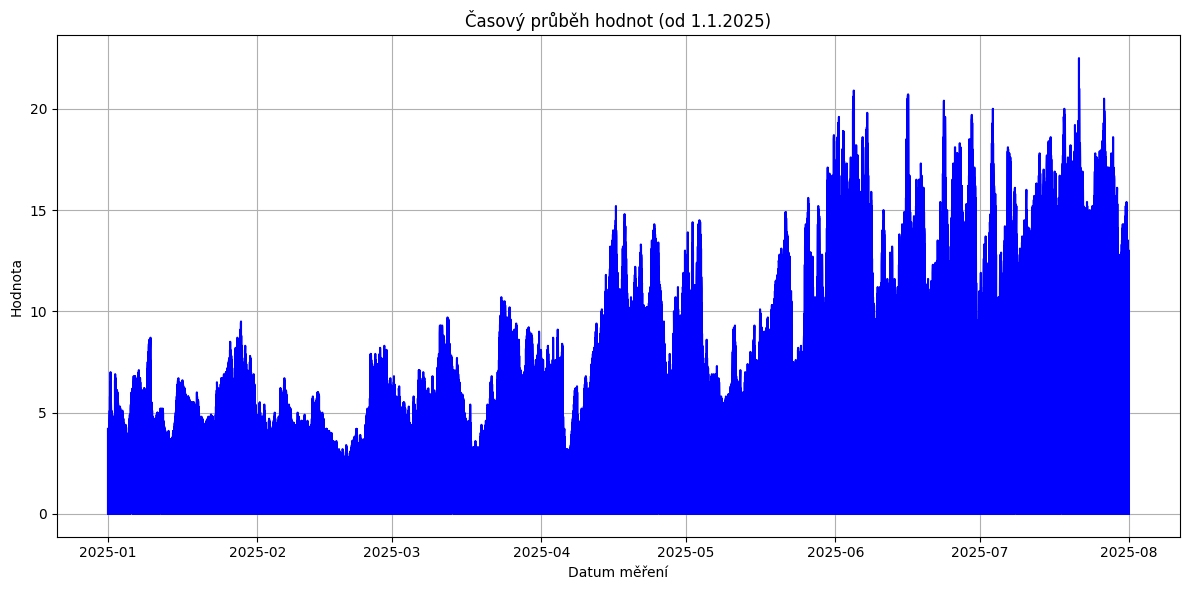

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# rozbalení dat (pokud už máš df_expanded, můžeš začít odtud)
expanded = []
for _, row in df.iterrows():
    for record in row['data_data_values']:
        expanded.append({
            "datumVytvoreni": row['datumVytvoreni'],
            "measurement_id": record[0],
            "typ": record[1],
            "measurement_date": record[2],
            "value": record[3],
            "other": record[4],
            "flag": record[5]
        })

df_expanded = pd.DataFrame(expanded)

# převod na datetime
df_expanded['measurement_date'] = pd.to_datetime(df_expanded['measurement_date'], errors='coerce')

# filtr od 1.1.2025
df_filtered = df_expanded[df_expanded['measurement_date'] >= "2025-01-01"]

# seřazení
df_filtered = df_filtered.sort_values('measurement_date')

# line graf bez značek
plt.figure(figsize=(12,6))
plt.plot(df_filtered['measurement_date'], df_filtered['value'], linestyle='-', color='blue')
plt.title("Časový průběh hodnot (od 1.1.2025)")
plt.xlabel("Datum měření")
plt.ylabel("Hodnota")
plt.grid(True)
plt.tight_layout()
plt.show()



## Adding data 2025 from JSON and make line graf from hour average

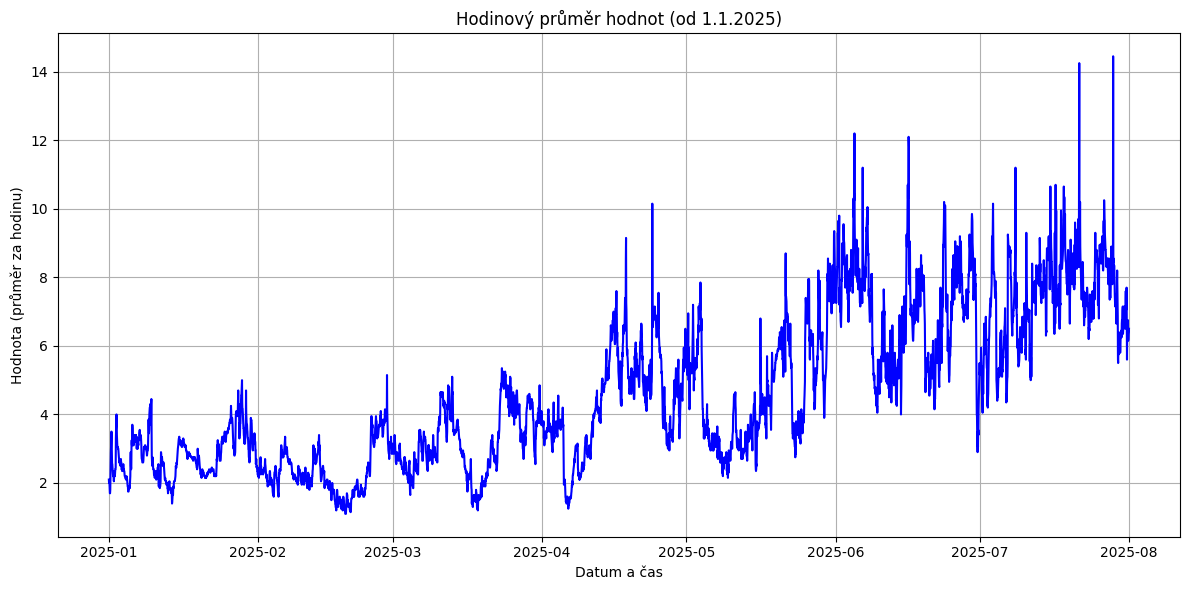

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# předpokládám, že už máš df_expanded s 'measurement_date' a 'value'

# převod na datetime
df_expanded['measurement_date'] = pd.to_datetime(df_expanded['measurement_date'], errors='coerce')

# filtr od 1.1.2025
df_filtered = df_expanded[df_expanded['measurement_date'] >= "2025-01-01"]

# nastavení datumu jako index pro resampling
df_filtered = df_filtered.set_index('measurement_date')

# hodinový průměr
df_hourly = df_filtered['value'].resample("h").mean()

# line graf bez značek
plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly.values, linestyle='-', color='blue')
plt.title("Hodinový průměr hodnot (od 1.1.2025)")
plt.xlabel("Datum a čas")
plt.ylabel("Hodnota (průměr za hodinu)")
plt.grid(True)
plt.tight_layout()
plt.show()
